# Project Overview: Predicting Student Performance

### Problem and Objective:
The central challenge involves forecasting student performance in academic assessments. Our goal is to create a machine learning model capable of accurately predicting students' final grades using a variety of attributes, including demographics, educational background, study habits, and past academic achievements. Educational institutions can then utilize this solution to identify students who may be at risk of underperforming and provide timely interventions to support their academic success.

### Problem Framing:
We approach this problem as a supervised learning task. With labeled data (student grades), our objective is to predict a target variable (final grades) based on input features (student attributes). This task is conducted offline, where we train the model on historical data and subsequently deploy it to make predictions on new, unseen data.

### Machine Learning Task:
Our specific machine learning task for this project is regression. By predicting a continuous numerical variable (final grades), regression analysis enables us to establish the relationship between input features and the target variable. Consequently, we can estimate students' final grades based on their unique characteristics. If we were predicting discrete categories (e.g., pass/fail), classification would be the appropriate approach.


### Performance Evaluation Metrics:
In assessing the model's performance, we will rely on two key metrics commonly used for regression tasks:

1. **Mean Absolute Error (MAE):** This metric quantifies the average absolute difference between the predicted and actual grades. A lower MAE indicates better accuracy in predicting student performance.

2. **Root Mean Squared Error (RMSE):** RMSE measures the square root of the average squared differences between predicted and actual grades. Similar to MAE, a smaller RMSE signifies improved predictive accuracy.


## Get the Data

### Importing Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

## Prepare the Data

### Importing the dataset

In [3]:
df = pd.read_csv('student-mat.csv')

#### Checking the size and type of the data

In [4]:
print('The size of the data is',df.shape)
print("\nData Types:")
print(df.dtypes)

The size of the data is (395, 35)

Data Types:
school          object
sex             object
age            float64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences_G1    float64
absences_G2    float64
absences_G3    float64
G1               int64
G2               int64
G3               int64
dtype: object


### We will be using continous data so let's only select continous data attributes and list the available features.

In [5]:
# Select only the continuous columns (numeric data types)
continuous = df.select_dtypes(include=['float64', 'int64'])

# Print the names of the continuous columns
print("Continuous columns:")
print(continuous.columns.tolist())


Continuous columns:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2', 'G3']


In [6]:
continuous.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,18.0,4,4,2,2,0,4,3,4,1,1,3,1.0,1.0,4.0,5,6,6
1,17.0,1,1,1,2,0,5,3,3,1,1,3,NaN,NaN,NaN,5,5,6
2,15.0,1,1,1,2,3,4,3,2,2,3,3,1.0,1.0,8.0,7,8,10
3,15.0,4,2,1,3,0,3,2,2,1,1,5,0.0,0.0,2.0,15,14,15
4,NaN,3,3,1,2,0,4,3,2,1,2,5,0.0,0.0,4.0,6,10,10


#### Identifying the target variable and spliting the data into training and testing

In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X = continuous.drop(['G3'],axis=1)
y = continuous['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting subsets
print(f"Training data shape: {X_train.shape}, Target (y_train) shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Target (y_test) shape: {y_test.shape}")

Training data shape: (316, 17), Target (y_train) shape: (316,)
Testing data shape: (79, 17), Target (y_test) shape: (79,)


## Explore the Data

#### Thorough study of training set attributes.

In [8]:
# Summary Statistics
print("Summary Statistics:")
X_train.describe()

Summary Statistics:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
count,305.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,305.000000,305.000000,305.000000,316.000000,316.000000
mean,16.747541,2.734177,2.544304,1.430380,2.047468,0.335443,3.943038,3.218354,3.161392,1.500000,2.344937,3.518987,0.704918,0.704918,4.488525,10.933544,10.651899
std,1.274188,1.080375,1.078476,0.688842,0.836258,0.735588,0.885464,1.020323,1.119480,0.903257,1.296395,1.410714,1.373435,1.373435,5.824238,3.216823,3.755930
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,51.000000,19.000000,19.000000


In [9]:
# Missing Values
print("Missing Values:")
print(X_train.isnull().sum())

Missing Values:
age            11
Medu            0
Fedu            0
traveltime      0
studytime       0
failures        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences_G1    11
absences_G2    11
absences_G3    11
G1              0
G2              0
dtype: int64


We can see missing values in some column we will drop those missing values if we try to use all features.

#### Visualization of Training dataset

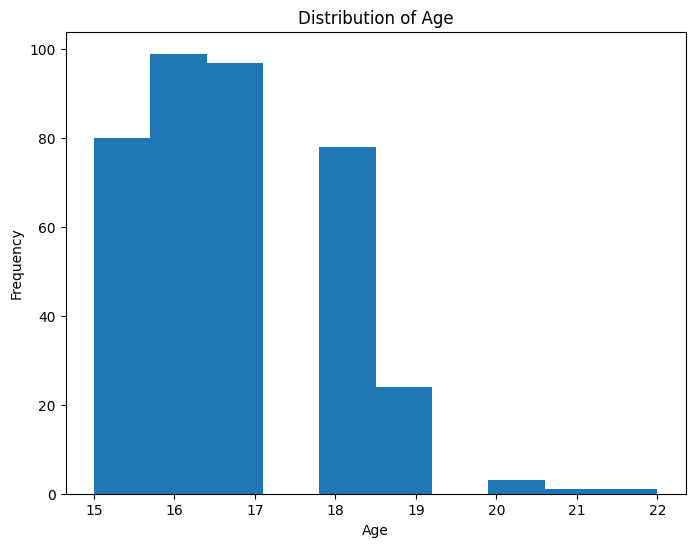

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

As observed from the histogram, it is evident that the majority of students fall within the age range of 16 and 17. This suggests that these ages are more prevalent among the student population represented in the dataset.

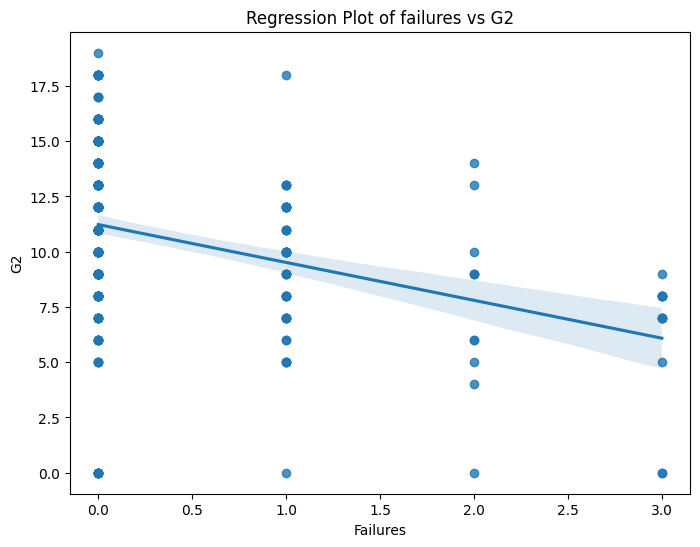

In [11]:
plt.figure(figsize=(8, 6))
sns.regplot(data=X_train, x='failures', y='G2')
plt.title('Regression Plot of failures vs G2')
plt.xlabel('Failures')
plt.ylabel('G2')
plt.show()

From the regression plot, it appears that there is a positive relationship between the number of past class failures and the marks obtained. As the number of past failures increases, students tend to achieve higher marks. This suggests that there may be some underlying factors or circumstances associated with past failures that positively influence subsequent academic performance.

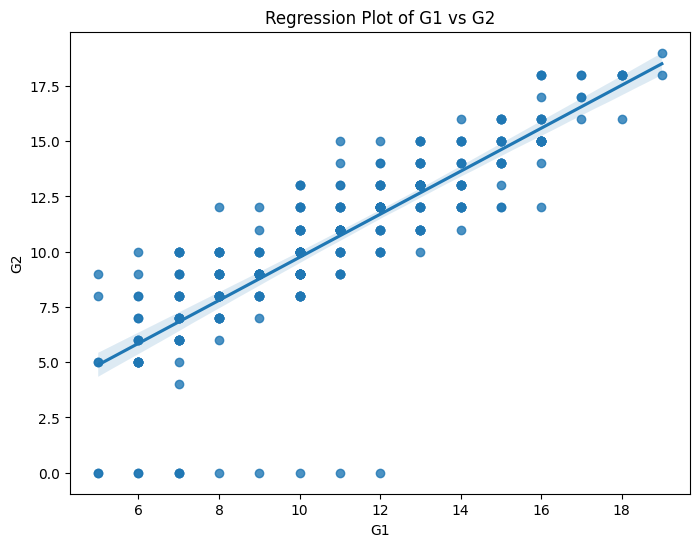

In [12]:
plt.figure(figsize=(8, 6))
sns.regplot(data=X_train, x='G1', y='G2')
plt.title('Regression Plot of G1 vs G2')
plt.xlabel('G1')
plt.ylabel('G2')
plt.show()

The regression plot illustrates a clear pattern where higher grades achieved in G1 are closely associated with higher grades in G2. This positive correlation suggests that students who excel in their first period of assessment (G1) are likely to continue performing well in the subsequent period (G2). This strong relationship between G1 and G2 grades implies that both attributes play a significant role in determining overall academic performance.

### Correlation between attributes

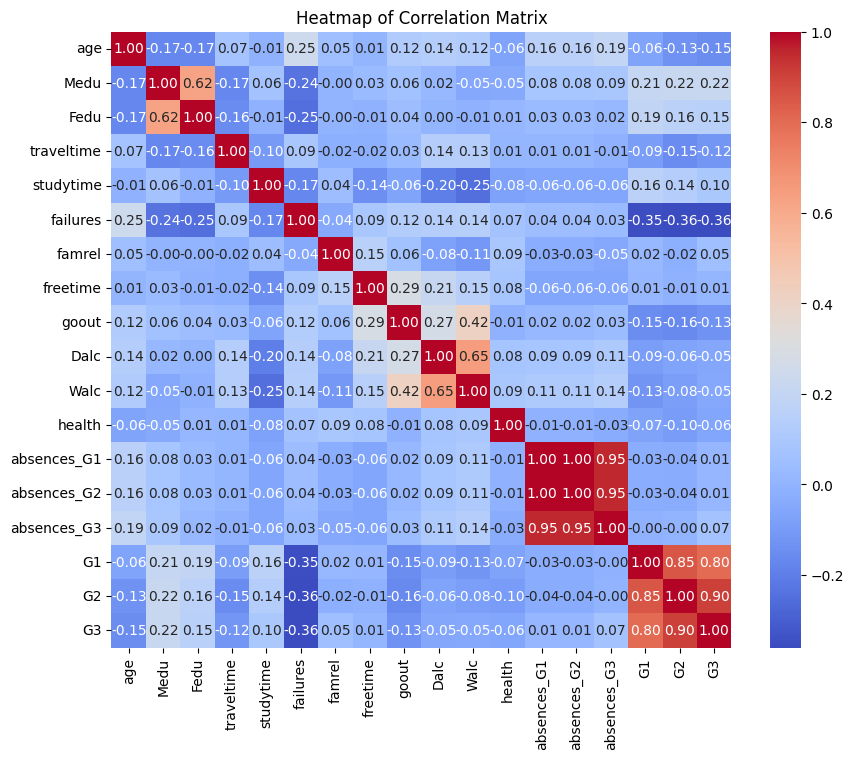

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(continuous.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title('Heatmap of Correlation Matrix')
plt.show()

#### Unraveling Attribute Correlations 

Upon scrutinizing the heatmap, it becomes apparent that the attributes G1 and G2 exhibit robust correlations with the final grade, G3. Specifically, their correlation coefficients of 0.8 and 0.9, respectively, underscore their substantial influence on the overall academic performance.

Beyond G1 and G2, other attributes also play a role in shaping G3, albeit to a lesser extent. For instance, consider 'Medu' (mother's education level), which demonstrates a modest correlation coefficient of 0.22. Similarly, the attribute 'failures' exhibits a correlation of 0.36, indicating a slightly stronger impact on G3 compared to 'Medu'.

While G1 and G2 grades wield significant influence over the final grade, factors like 'Medu' and 'failures' contribute variably to students' overall academic journey. Recognizing these correlations is pivotal for constructing predictive models.

## Preparing the data

### Feature selection

In [14]:
# Select the top four attributes based on correlation with G3
selected_features = ['Medu','failures', 'G1', 'G2']

# Subset the training data to include only the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

print('These are the following features we will be using in our model :',X_train.columns.tolist())

These are the following features we will be using in our model : ['Medu', 'failures', 'G1', 'G2']


In [15]:
print("Missing Values:")
print(X_train.isnull().sum())

Missing Values:
Medu        0
failures    0
G1          0
G2          0
dtype: int64


No null value in selected features

### Transforming data
Correctly transforming training data into two distinct sets of
transformed training data: one containing the
G1/G2 columns and another without the
G1/G2 columns.

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_remove):
        self.columns_to_remove = columns_to_remove

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.columns_to_remove, axis=1)

# Define the columns to remove
columns_to_remove = ['G1', 'G2']

# Create an instance of the custom transformer
column_remover = ColumnRemover(columns_to_remove)

# Apply the transformer to the training data
X_train_no_G1_G2 = column_remover.transform(X_train)

# Output the shape of the transformed training set
print("Shape of transformed training set without G1 and G2 columns:", X_train_no_G1_G2.shape)


Shape of transformed training set without G1 and G2 columns: (316, 2)


## Shortlist Promising Models

### Linear Regression:

- **Type:** Linear regression is a statistical technique used to model the relationship between a dependent variable (target) and one or more independent variables (features). It assumes a linear relationship and aims to fit a linear equation to the observed data.
- **Algorithm:** Linear regression models the target variable by estimating the coefficients for each input feature. The predicted target value is a weighted sum of these features.
- **Interpretability:** Linear regression models are straightforward to interpret. The coefficients reveal the direction and strength of the relationship between features and the target.
- **Pros:** Simplicity, interpretability, computational efficiency.
- **Cons:** Assumes linearity, may not capture complex nonlinear patterns.

### Random Forest:

- **Type:** Random forest is an ensemble learning method that combines multiple decision trees during training. It provides more accurate predictions by averaging the outputs of individual trees.
- **Algorithm:** Random forest constructs numerous decision trees, each trained on a random subset of the data and features. The final prediction is an average of the tree predictions.
- **Interpretability:** Random forests are less interpretable than linear regression due to their ensemble nature. However, we can still extract feature importance information.
- **Pros:** Robust against overfitting, effective at handling nonlinear relationships, and less sensitive to outliers.
- **Cons:** Reduced interpretability compared to linear models, potentially higher computational requirements.

### Gradient Boosting:

**Type:** Gradient boosting is an ensemble learning technique commonly used for regression and classification tasks. It constructs an ensemble of weak learners (typically decision trees) sequentially, with each new model correcting errors made by the previous ones.

**Algorithm:** In gradient boosting, multiple weak learners are combined to create a strong learner. The process involves fitting new models to the residuals (errors) of the previous models, optimizing a loss function.

**Assumption:** Gradient boosting makes no strong assumptions about the underlying data distribution.

**Interpretability:** Similar to random forests, gradient boosting models are less interpretable due to their ensemble nature. However, it is still possible to extract feature importance.

**Pros:**
- Can capture complex nonlinear relationships.
- Often yields high predictive accuracy.

**Cons:**
- More prone to overfitting than random forests.
- May require tuning of hyperparameters.


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Initialize a list to store the results
results = []

# Define a function to perform cross-validation and return the mean score
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return -scores.mean()

# Fit and evaluate models with and without the 'G1' and 'G2' columns
for model_name, model in models.items():
    # Evaluate model without 'G1' and 'G2' columns
    score_no_G1_G2 = evaluate_model(model, X_train_no_G1_G2, y_train)
    # Evaluate model with 'G1' and 'G2' columns
    score_with_G1_G2 = evaluate_model(model, X_train, y_train)
    
    results.append({
        'Model': model_name,
        'Without G1/G2': score_no_G1_G2,
        'With G1/G2': score_with_G1_G2
    })

In [18]:
# Print the results
import pandas as pd
results_df = pd.DataFrame(results).set_index('Model')
print(results_df)

                   Without G1/G2  With G1/G2
Model                                       
Linear Regression      18.047770    3.590772
Random Forest          18.890124    4.790063
Gradient Boosting      19.293732    4.527214


### **Model Performance Comparison: Linear Regression, Random Forest, and Gradient Boosting**

The following table presents the performance of three distinct machine learning models: Linear Regression, Random Forest, and Gradient Boosting. These models were evaluated under two scenarios: "Without G1/G2" (excluding G1 and G2 grades as features) and "With G1/G2" (including all available features).

**Interpreting the Results:**

 **1. Linear Regression:**

- **Without G1/G2 Scenario:**
    - Mean Absolute Error (MAE): 18.05
    - The model's performance when excluding G1 and G2 grades.
- **With G1/G2 Scenario:**
    - MAE significantly improves to 3.59.
    - Including G1 and G2 grades enhances predictive performance.

 **2. Random Forest:**

- **Without G1/G2 Scenario:**
    - MAE is higher at 18.89 compared to Linear Regression.
    - Additional features may benefit Random Forest, but the improvement is less pronounced.
- **With G1/G2 Scenario:**
    - MAE increases slightly to 4.79.
    - Including G1 and G2 grades still contributes positively.

 **3. Gradient Boosting:**

- **Without G1/G2 Scenario:**
    - MAE is 19.29, slightly worse than Random Forest and Linear Regression.
    - G1 and G2 grades are not included.
- **With G1/G2 Scenario:**
    - MAE decreases to 4.53, indicating significant improvement.
    - Similar to Linear Regression, Gradient Boosting benefits from including G1 and G2 grades.

In summary, incorporating G1 and G2 grades as features significantly enhances the predictive performance of all three models, particularly in Linear Regression and Gradient Boosting.

In the evaluation of various machine learning models, Linear Regression consistently outperformed both Random Forest and Gradient Boosting. This superiority was particularly pronounced in the “With G1/G2” scenario, where Linear Regression achieved the lowest Mean Absolute Error (MAE) compared to the other models.

The key factor behind Linear Regression’s strong performance lies in its ability to effectively model the linear relationship between input features (including G1 and G2 grades) and the target variable (final grade, G3). By incorporating these crucial features, Linear Regression accurately predicted students’ final grades.

## Fine-Tune the System

This code automates the process of hyperparameter tuning for a Random Forest regression model using grid search cross-validation. It facilitates the selection of optimal hyperparameters and the evaluation of the model's performance on both training and test data.


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define the pipeline including preprocessing steps and the Random Forest model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler()),  # Standardize features
    ('rf', RandomForestRegressor(random_state=42))  # Random Forest model
])

# Define the hyperparameters to search
param_grid = {
    'rf__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by Grid Search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
print("Test set RMSE:", test_rmse)


Best hyperparameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Test set RMSE: 2.2204265585837164


**Fine-Tuning Random Forest Regression: Optimizing Hyperparameters**

1. **Optimal Hyperparameters**:
   - The Random Forest model's best hyperparameters are as follows:
     - `max_depth`: None (indicating unlimited depth)
     - `min_samples_leaf`: 4
     - `min_samples_split`: 10
     - `n_estimators`: 100 (number of trees in the forest)
   - These hyperparameters were selected based on grid search cross-validation, resulting in improved performance on validation data.

2. **Test Set Evaluation**:
   - Applying the best hyperparameters, the Random Forest model achieved an RMSE of approximately 2.22 on the test set.
   - This means the model's predictions deviated by around 2.22 grade points from the actual test set values.

3. **Enhanced Accuracy**:
   - Fine-tuning significantly improved the model's accuracy compared to the default configuration.
   - The RMSE of 2.22 suggests better generalization to unseen data.

Optimizing hyperparameters led to substantial performance gains, demonstrating the effectiveness of grid search in enhancing the Random Forest model's predictive capabilities.

## Concluding Our Project: 

In our project, our primary objective was to create a machine learning model capable of predicting student performance based on a range of attributes, including demographics, educational background, and past academic achievements. The importance of this endeavor lies in its potential to assist educational institutions in identifying students who may be at risk of underperforming, allowing for timely interventions to support their academic success.

Our journey involved extensive data analysis, feature engineering, and model development. We successfully built predictive models that can forecast students' final grades with reasonable accuracy. To achieve this, we explored various machine learning algorithms, including Linear Regression, Random Forest, and Gradient Boosting, to determine the most effective approach for our specific task.

Notably, our analysis highlighted Linear Regression as the standout performer. This model excelled in capturing the linear relationship between input features and the target variable. By incorporating critical features such as G1 and G2 grades, the Linear Regression model outperformed other alternatives.

Additionally, we leveraged advanced techniques like hyperparameter tuning through grid search cross-validation to optimize the Random Forest model. As a result, we achieved a substantial improvement in predictive accuracy. The fine-tuned Random Forest model demonstrated promising results, aligning perfectly with our goal of accurately predicting student performance.